Perform this activity under GPU runtime i.e., while opening the colab notebook there is an option of Runtime there under that it has change runtime type a box will appear from there click on drop down menu and check the GPU instead of None, hence it will lead to faster computation and will take some time to get computer

In [ ]:
# these are some of the modules
import tensorflow as tf # tensorflow is the module used in deep learning for complex computing
import keras # keras is the API which works on tensorflow to make accessibility of tensorflow easier
from keras.datasets import mnist # code to import mnist data from keras library
# not downloading and mounting because it a heavy file
import matplotlib.pyplot as plt # used to plot images,graphs
import numpy as np # used for mathematical calculations in 2d arrays
from keras import models # used to get the sequential flow layer for neural networks
from keras.layers import Dense,MaxPooling2D,Flatten,Conv2D,Dropout
# These all are neural layers  
# Dense layer is typical artificial neural networks
# MaxPooling2D layer is used to reduce the complexity of image
# Flatten is used to convert 2d image into 1d image ie., in an array form
# Conv2d is used in image processing and its too a neural layer
# Dropout layer is used in model so it does not do overfitting

In [ ]:
# loading the data from keras and storing accordingly in train and test
(x_train,y_train), (x_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


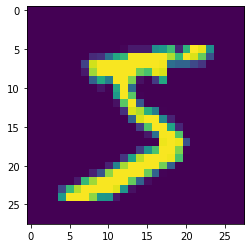

In [ ]:
# an example how to look onto image from img data
plt.imshow(x_train[0])

In [ ]:
# reshaping the train and test file of x_feature into 3D from 2D
x_train = np.reshape(x_train,(-1,28,28,1))
x_test = np.reshape(x_test,(-1,28,28,1))

In [ ]:
# Shape of training datas
x_train.shape,x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
# One hot encoding the y_labels of train and test
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
# since the no. possible is from 0 to 9 so it has been encodded in such a way
# that if the number is 5 then on the 6th index it will make it 1 and rest 0
# that is one hot encoding
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
# shape of training labels of y
y_train.shape,y_test.shape

((60000, 10), (10000, 10))

In [ ]:
# choosing our flow of neural netowrk ie., in sequential order
new_model = keras.Sequential()

In [ ]:
# these are the bunch of neual layers making it a neural networks with 
# multiple hyperparameters
conv1 = Conv2D(32, kernel_size = (5,5), strides = (1,1), padding = 'same', data_format = 'channels_last', activation = 'relu', use_bias = True, input_shape = (28,28,1))
max_pool1 = MaxPooling2D(pool_size = (2,2), strides = (1,1), padding = 'same', data_format = 'channels_last')
conv2 = Conv2D(64, kernel_size = (5,5), strides = (1,1), padding = 'same', data_format = 'channels_last', activation = 'relu', use_bias = True) 
max_pool2 = MaxPooling2D(pool_size = (2,2), strides = (1,1), padding = 'same', data_format = 'channels_last')
flat_layer = Flatten()
dense_layer = Dense(1024, activation = 'relu', use_bias = True)
drop_layer = Dropout(0.4)
output_layer = Dense(10, activation = 'softmax', use_bias = True)

In [ ]:
# adding the neural layers into sequential model for sequential flow
new_model.add(conv1)
new_model.add(max_pool1)
new_model.add(conv2)
new_model.add(max_pool2)
new_model.add(flat_layer)
new_model.add(dense_layer)
new_model.add(drop_layer)
new_model.add(output_layer)

In [ ]:
# looking the model summary with with total parameters to be trained is 51,443,594
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 1024)              5

In [ ]:
# compiling the model 
new_model.compile(optimizer = 'rmsprop',loss = keras.losses.categorical_crossentropy,metrics = ['accuracy'])

In [ ]:
# fitting the model with training data
new_model.fit(x_train,y_train,batch_size = 50,epochs = 20)

Epoch 1/20
1200/1200 [==============================] - 45s 28ms/step - loss: 2.2673 - accuracy: 0.9209
Epoch 2/20
1200/1200 [==============================] - 33s 28ms/step - loss: 0.1571 - accuracy: 0.9637
Epoch 3/20
1200/1200 [==============================] - 33s 28ms/step - loss: 0.1401 - accuracy: 0.9685
Epoch 4/20
1200/1200 [==============================] - 33s 28ms/step - loss: 0.1622 - accuracy: 0.9683
Epoch 5/20
1200/1200 [==============================] - 33s 28ms/step - loss: 0.1818 - accuracy: 0.9661
Epoch 6/20
1200/1200 [==============================] - 33s 28ms/step - loss: 0.2026 - accuracy: 0.9629
Epoch 7/20
1200/1200 [==============================] - 33s 28ms/step - loss: 0.2104 - accuracy: 0.9632
Epoch 8/20
1200/1200 [==============================] - 33s 28ms/step - loss: 0.2345 - accuracy: 0.9602
Epoch 9/20
1200/1200 [==============================] - 33s 28ms/step - loss: 0.2571 - accuracy: 0.9589
Epoch 10/20
1200/1200 [==============================] - 33s 28m

In [ ]:
# using model for testing and getting accuracy of 97%
new_model.evaluate(x_test,y_test,batch_size = 80)

125/125 [==============================] - 1s 6ms/step - loss: 0.3285 - accuracy: 0.9666


[0.32848820090293884, 0.9666000008583069]

In [ ]:
# doing some manual testing
def cal(ip):
  testing_img = x_test[ip]
  testing_img2 = testing_img.reshape(-1,28,28,1)
  pred = new_model.predict(testing_img2)
  class_id = np.argmax(pred[0])
  print("Predicted image value :",class_id)

Enter a value from 0 to 9999 :9000
Predicted image value : 7


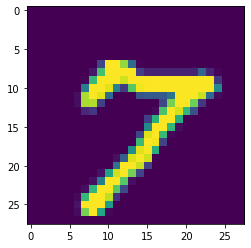

In [ ]:
ip = int(input("Enter a value from 0 to 9999 :"))
cal(ip)
dummy = np.reshape(x_test[ip],(28,28))
plt.imshow(dummy)